# Progresso da Vacinação contra a COVID-19 pelo Mundo

### Bibliotecas usadas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

### Primeiro contato com a base de dados

In [3]:
df = pd.read_csv('vaccinations.csv')

In [4]:
df.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'daily_vaccinations_per_million'],
      dtype='object')

Como pode se ver, está é uma base de dados bem completa sobre a vacinação contra a COVID-19 pelo mundo. De acordo com o Our World In Data, a descrição de cada coluna é a seguinte:

- location: nome do país;
- iso_code: código de 3 letras do país;
- date: data da observação;
- total_vaccionations: número de doses administradas;
- people_vaccinated: número de pesssoas que receberam ao menos uma dose;
- people_fully_vaccinated: número de pessoas que receberam todas as doses prescritas pelo protocolo da vacina administrada;
- total_boosters: número de doses de reforço administradas;
- daily_vaccinations_raw: mudança diária no total de números de doses administradas (raw);
- daily_vaccinations: mudança diária no total de números de doses administradas;
- total_vaccinations_per_hundred: número total de doses administradas a cada 100 pessoas da população do país;
- people_vaccinated_per_hundred: número total de pessoas vacinadas a cada 100 pessoas da população do país;
- people_fully_vaccinated_per_hundred: número total de pessoas completamente vacinadas a cada 100 pessoas da população do país;
- total_boosters_per_hundred: número total de doses de reforço administradas a cada 100 pessoas da população do país;
- daily_vaccinations_per_million: mudança diária no total de números de doses administradas por 1000000 pessoas no total da população do país.


Vamos dar uma checada nas primeiros 10 linhas do nosso dataframe: 

In [5]:
df.head(10)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,NaN,40.0
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,NaN,45.0
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,NaN,50.0


Observamos que temos várias linhas para um único pais, isso porque é uma linha para cada data de observação, visto que colunas como daily_vaccionations é atualizada diariamente.

Abaixo podemos ver a quantidade de observações diárias feitas para cada localidade:

In [6]:
df['location'].value_counts()

European Union      318
High income         318
Europe              318
World               318
Denmark             317
                   ... 
Haiti                87
Pitcairn             85
Falkland Islands     67
Tanzania             57
Niue                 43
Name: location, Length: 234, dtype: int64

Vamos explorar um pouco mais a respeito da estrutura do nosso dataframe:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54840 entries, 0 to 54839
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             54840 non-null  object 
 1   iso_code                             54840 non-null  object 
 2   date                                 54840 non-null  object 
 3   total_vaccinations                   31374 non-null  float64
 4   people_vaccinated                    29934 non-null  float64
 5   people_fully_vaccinated              26672 non-null  float64
 6   total_boosters                       3790 non-null   float64
 7   daily_vaccinations_raw               26367 non-null  float64
 8   daily_vaccinations                   54576 non-null  float64
 9   total_vaccinations_per_hundred       31374 non-null  float64
 10  people_vaccinated_per_hundred        29934 non-null  float64
 11  people_fully_vaccinated_per_

In [8]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
count,3.137400e+04,2.993400e+04,2.667200e+04,3.790000e+03,2.636700e+04,5.457600e+04,31374.000000,29934.000000,26672.000000,3790.000000,54576.000000
mean,8.957088e+07,4.898056e+07,3.183939e+07,1.724681e+06,9.962535e+05,4.924555e+05,46.982466,27.886401,21.150545,1.841153,3491.702928
std,4.330978e+08,2.397450e+08,1.661651e+08,4.369879e+06,3.998401e+06,2.763777e+06,47.221264,25.226877,22.520373,5.410398,4238.888306
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.270145e+05,2.443705e+05,1.299978e+05,9.225000e+01,6.396500e+03,1.051750e+03,5.550000,4.140000,2.280000,0.000000,560.000000
50%,2.388812e+06,1.628545e+06,1.056168e+06,3.786900e+04,3.525500e+04,8.656000e+03,29.865000,20.730000,11.720000,0.020000,2245.000000
75%,1.376711e+07,8.611501e+06,5.866218e+06,8.888680e+05,2.218355e+05,6.003875e+04,80.447500,49.050000,36.210000,0.607500,5188.000000
max,6.614716e+09,3.726893e+09,2.812179e+09,4.247334e+07,5.627306e+07,4.338896e+07,240.660000,118.610000,117.910000,43.450000,117497.000000


In [9]:
df.isnull().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     23466
people_vaccinated                      24906
people_fully_vaccinated                28168
total_boosters                         51050
daily_vaccinations_raw                 28473
daily_vaccinations                       264
total_vaccinations_per_hundred         23466
people_vaccinated_per_hundred          24906
people_fully_vaccinated_per_hundred    28168
total_boosters_per_hundred             51050
daily_vaccinations_per_million           264
dtype: int64

### Índice de pessoas vacinadas e índice de pessoas completamente vacinadas

Algumas das colunas que me chamaram atenção são as 'people_vaccinate_per_hundred' e a 'people_fully_vaccinated_per_hundred'. Pois elas apresentam a porcentagem da população vacinada em razão do total de habitantes do país/localidade. Sendo uma métrica melhor de comparação que simplesmente usar a 'people_vaccinate' ou 'people_fully_vaccinate', pois países com uma população grande receberá proporcionalmente mais vacinas, mas isso não significa que a campanha de vacinação está avançada, já as features que usam porcentagem nos traz essas informações.

Vamos então,  calcular o valor máximo das features 'people_vaccinate_per_hundred' e 'people_fully_vaccinated_per_hundred' para cada país da nossa base:

In [10]:
people_vaccinated_per_hundred = df.groupby(['location'], sort=False)['people_vaccinated_per_hundred'].max().sort_values(ascending=False)
people_fully_vaccinated_per_hundred = df.groupby(['location'], sort=False)['people_fully_vaccinated_per_hundred'].max().sort_values(ascending=False)

Graficamente, temos para o percentual de pessoas vacinadas:

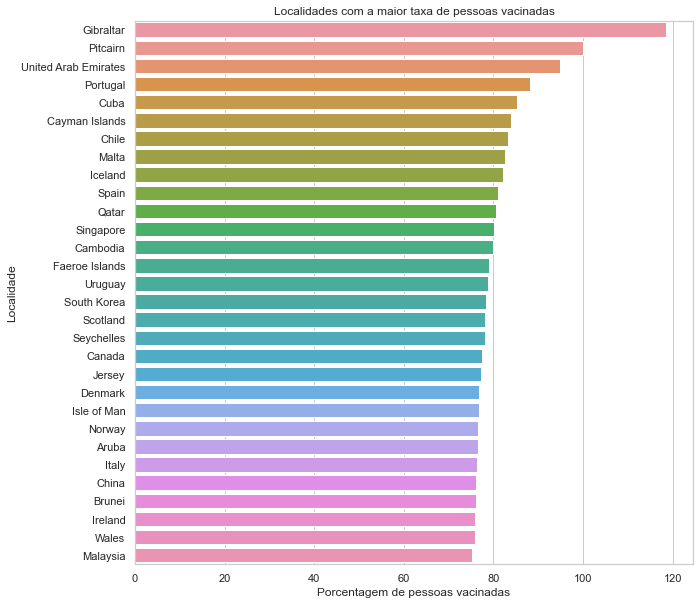

In [11]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax =sns.barplot(x=people_vaccinated_per_hundred.head(30).values, y=people_vaccinated_per_hundred.head(30).index)
ax.set_xlabel("Porcentagem de pessoas vacinadas")
ax.set_ylabel("Localidade")
ax.set_title("Localidades com a maior taxa de pessoas vacinadas")
plt.show()

Nesse gráfico observamos os países com a campanha de vacinação mais avançada. Note que Gibraltar está com uma taxa maior que 100% (que na teoria era pra ser o limite), vamos tentar entender este comportamento:

In [12]:
# Obtendo o número de pessoas vacinadas em gibraltar
df[df['location'] == 'Gibraltar']['people_vaccinated'].max()

39961.0

De acordo com o wikipedia, em 2015 a península de Gibraltar possuia 32194 habitantes. Porém como visto acima, a nossa base de dados alega que Gibraltar vacinou 39961 pessoas. Essa é uma possível explicação para a taxa de vacinação ser de quase 120%.

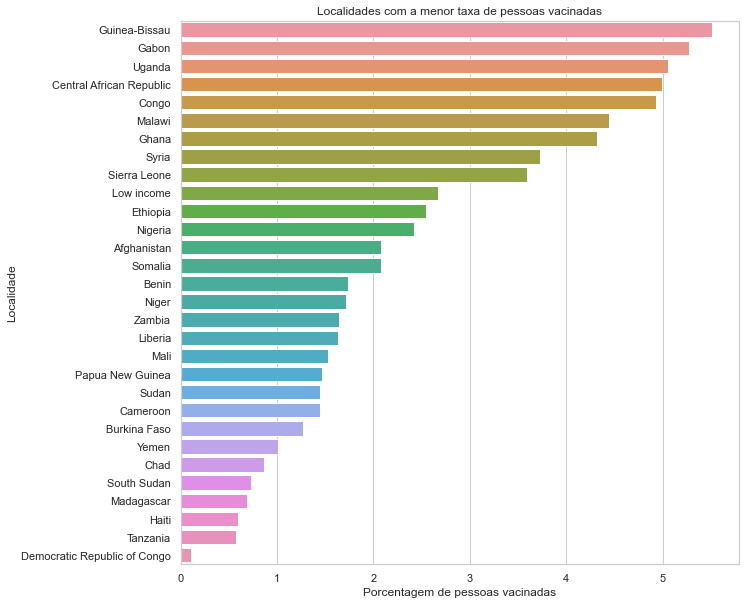

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax =sns.barplot(x=people_vaccinated_per_hundred.tail(30).values, y=people_vaccinated_per_hundred.tail(30).index)
ax.set_xlabel("Porcentagem de pessoas vacinadas")
ax.set_ylabel("Localidade")
ax.set_title("Localidades com a menor taxa de pessoas vacinadas")
plt.show()

Agora observando a cauda desta lista, isto é, os paises com menor taxa de vacinação, podemos observar índices de menos de 5% da população vacinada e lembrando que a feature que estamos analisando (people_vaccinated_per_hundred) é a taxa das pessoas que receberam ao menos uma dose, o que faz das taxas de vacinação destas localidades serem bem preocupantes. Porém pode ser que tais localidades não divulgam dados sobre a campanha de vacinação para a COVID-19.

Vamos analisar agora a taxa de pessoas completamente vacinada, isto é, pessoas que receberam todas as doses protocoladas pela fabricante da vacina:

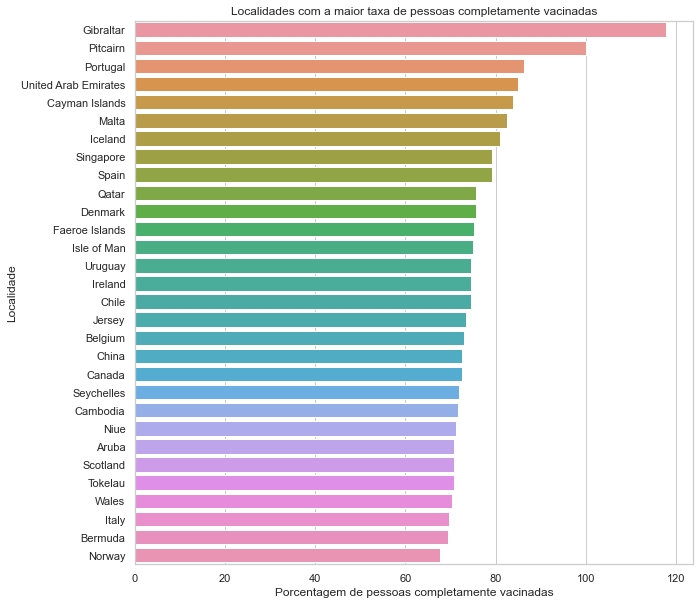

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax =sns.barplot(x=people_fully_vaccinated_per_hundred.head(30).values, y=people_fully_vaccinated_per_hundred.head(30).index)
ax.set_xlabel("Porcentagem de pessoas completamente vacinadas")
ax.set_ylabel("Localidade")
ax.set_title("Localidades com a maior taxa de pessoas completamente vacinadas")
plt.show()

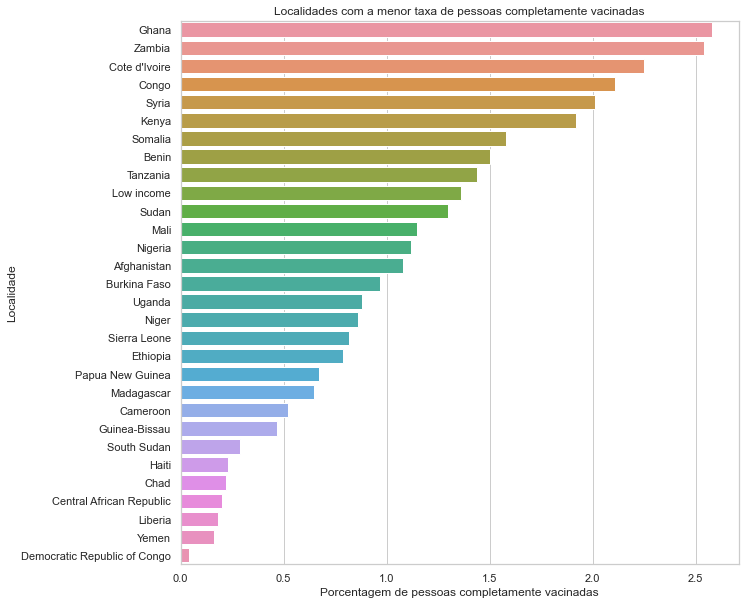

In [15]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax =sns.barplot(x=people_fully_vaccinated_per_hundred.tail(30).values, y=people_fully_vaccinated_per_hundred.tail(30).index)
ax.set_xlabel("Porcentagem de pessoas completamente vacinadas")
ax.set_ylabel("Localidade")
ax.set_title("Localidades com a menor taxa de pessoas completamente vacinadas")
plt.show()

As observações feitas anteriormente se aplicam para a taxa de pessoas completamente vacinadas em cada localidade.

### Tendência de doses administradas diariamente

Vamos analisar agora, a feature 'daily_vaccinations', que mostra a quantidade de doses aplicadas no dia em questão.

Primeiramente, vamos olhar a tendência global, somando a quantidade de doses aplicadas no dia em todas as localidades:

In [16]:
daily_vaccination = df.groupby('date')['daily_vaccinations'].sum()

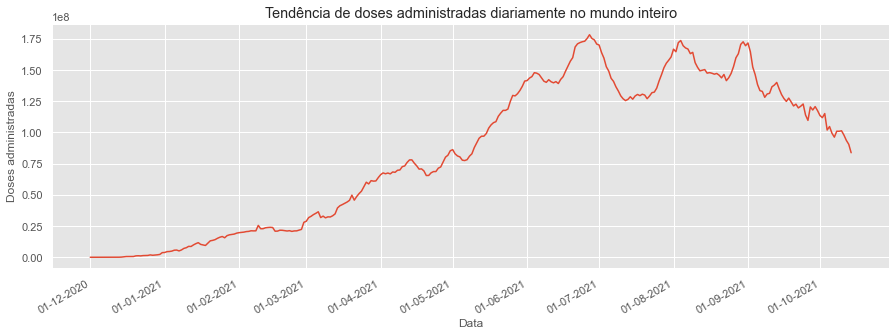

In [17]:
plt.style.use("ggplot")
plt.figure(figsize= (15, 5))
daily_vaccination.index = pd.to_datetime(daily_vaccination.index)
sns.lineplot(x=daily_vaccination.index, y=daily_vaccination.values)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_title('Tendência de doses administradas diariamente no mundo inteiro')
plt.gcf().autofmt_xdate()
plt.xlabel("Data")
plt.ylabel("Doses administradas")
plt.show()


Notamos uma tendência de crescimento desde o início da vacinação até Julho, quando começa-se uma instabilidade até Setembro, e a partir de Setembro a quantidade de doses diárias administradas tem diminuído. Provavelmente porque muitos países já estão adiantados na campanha de vacinação, encontrando-se num momento de hiato de vacinações, sendo provável que o número de vacinação diária volte a subir, uma vez que foi iniciado a administração da dose de reforço em alguns países.

In [18]:
daily_vaccination_br = df.loc[df['location'] == 'Brazil'].groupby('date')['daily_vaccinations'].sum()

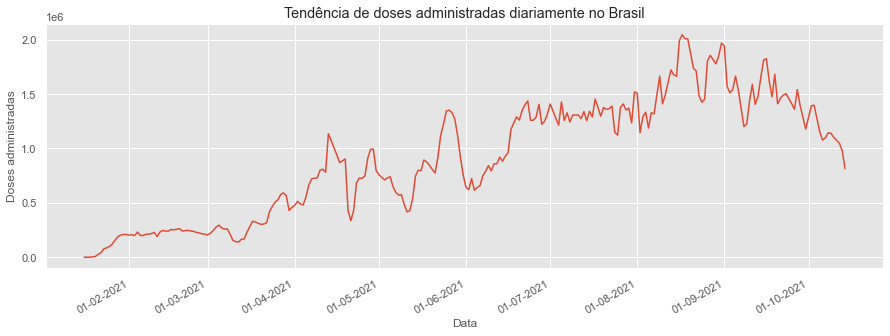

In [19]:
plt.figure(figsize= (15, 5))
daily_vaccination_br.index = pd.to_datetime(daily_vaccination_br.index)
sns.lineplot(x=daily_vaccination_br.index, y=daily_vaccination_br.values)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_title('Tendência de doses administradas diariamente no Brasil')
plt.gcf().autofmt_xdate()
plt.xlabel("Data")
plt.ylabel("Doses administradas")
plt.show()

Acima temos a tendência de doses administradas diariamente no Brasil. Notamos um comportamento similar com a tendência mundial. Porém notamos uma progressão menos suavizada, evidenciada pela grande quantidade de "micro picos locais".

Vamos agora analisar está tendência brasileira quando comparado a outros países que possuem uma população próxima à do Brasil:

In [20]:
daily_vaccination_br = df.loc[df['location'] == 'Brazil'].groupby('date')['daily_vaccinations'].sum()
daily_vaccination_usa = df.loc[df['location'] == 'United States'].groupby('date')['daily_vaccinations'].sum()
daily_vaccination_china = df.loc[df['location'] == 'China'].groupby('date')['daily_vaccinations'].sum()
daily_vaccination_uk = df.loc[df['location'] == 'United Kingdom'].groupby('date')['daily_vaccinations'].sum()

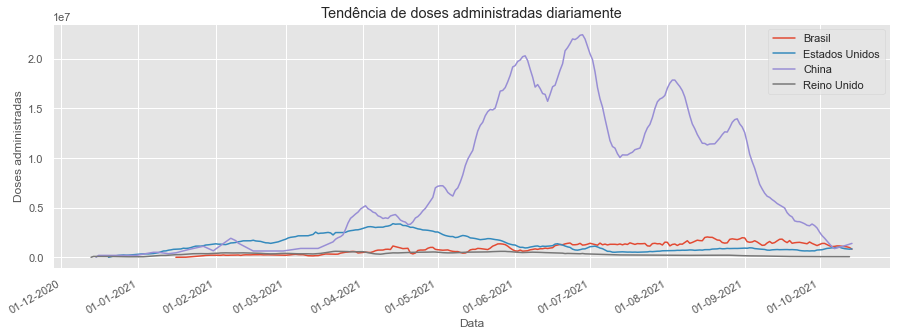

In [21]:
plt.figure(figsize= (15, 5))

daily_vaccination_br.index = pd.to_datetime(daily_vaccination_br.index)
daily_vaccination_usa.index = pd.to_datetime(daily_vaccination_usa.index)
daily_vaccination_china.index = pd.to_datetime(daily_vaccination_china.index)
daily_vaccination_uk.index = pd.to_datetime(daily_vaccination_uk.index)

plt.plot(daily_vaccination_br.index, daily_vaccination_br.values, label = "Brasil")
plt.plot(daily_vaccination_usa.index, daily_vaccination_usa.values, label = "Estados Unidos")
plt.plot(daily_vaccination_china.index, daily_vaccination_china.values, label = "China")
plt.plot(daily_vaccination_uk.index, daily_vaccination_uk.values, label = "Reino Unido")

plt.xlabel("Data")
plt.ylabel("Doses administradas")
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_title('Tendência de doses administradas diariamente')
plt.gcf().autofmt_xdate()

plt.show()

Bom, como foi dito anteriormente, comparar métricas entre países, sem uma forma de normalização dos dados, não é a melhor forma. Aqui vemos que a China é o pais que mais aplica doses por dia, isto devido à sua população ser muito maior que dos outros países da comparação. A forma mais justa de fazer esta comparação é analisando a tendência diária de doses administradas em função da população da localidade, e é isto que vamos fazer a seguir:

In [22]:
daily_vaccination_br = df.loc[df['location'] == 'Brazil'].groupby('date')['daily_vaccinations_per_million'].sum()
daily_vaccination_usa = df.loc[df['location'] == 'United States'].groupby('date')['daily_vaccinations_per_million'].sum()
daily_vaccination_china = df.loc[df['location'] == 'China'].groupby('date')['daily_vaccinations_per_million'].sum()
daily_vaccination_uk = df.loc[df['location'] == 'United Kingdom'].groupby('date')['daily_vaccinations_per_million'].sum()

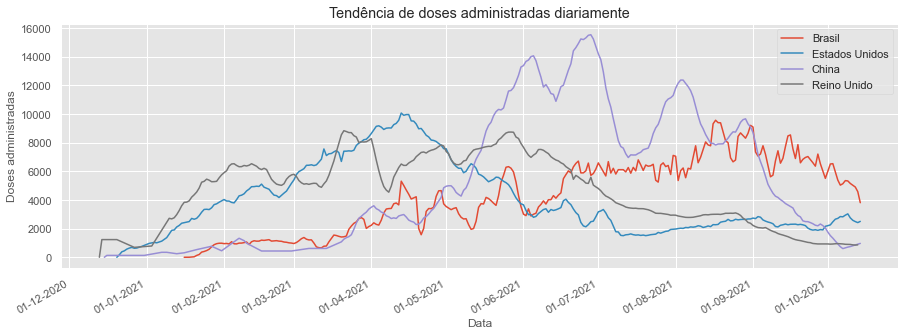

In [23]:
plt.figure(figsize= (15, 5))

daily_vaccination_br.index = pd.to_datetime(daily_vaccination_br.index)
daily_vaccination_usa.index = pd.to_datetime(daily_vaccination_usa.index)
daily_vaccination_china.index = pd.to_datetime(daily_vaccination_china.index)
daily_vaccination_uk.index = pd.to_datetime(daily_vaccination_uk.index)

plt.plot(daily_vaccination_br.index, daily_vaccination_br.values, label = "Brasil")
plt.plot(daily_vaccination_usa.index, daily_vaccination_usa.values, label = "Estados Unidos")
plt.plot(daily_vaccination_china.index, daily_vaccination_china.values, label = "China")
plt.plot(daily_vaccination_uk.index, daily_vaccination_uk.values, label = "Reino Unido")

plt.xlabel("Data")
plt.ylabel("Doses administradas")
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_title('Tendência de doses administradas diariamente')
plt.gcf().autofmt_xdate()

plt.show()

Bem melhor! Agora podemos comparar melhor a tendência de doses adminstradas diariamente entre os países. Notamos que os Estados Unidos e o Reino Unido foram os mais adiantados na vacinação, administrando muitas doses logo no início da campanha de vacinação e diminuindo o ritmo nos últimos meses. A China começou devagar a vacnição de sua população, mas a partir de Abril houve um grande crescimento na administração de doses diárias, tendo o seu pico em meados de Julho. O Brasil assim como a China começou devagar, mas ao contrário da China que em um pequeno intervalo de tempo aplicou um grande número de doses, a tendência de crescimento de doses aplicadas diariamente no Brasil tem sido lenta. É interessante notar também, que atualmente, dentre os países da comparação, o Brasil é o país que está aplicando mais doses diariamente.

### Administração da dose de reforço

Vamos agora direcionar nossos olhos para a aplicação das doses de reforço, que recentemente foi aprovado sua administração aqui no Brasil, mas que em alguns outros países já está bem adiantada.

Para esta análise, vamos usar a feature 'total_boosters_per_hundred', que nos retorna a quantidade de pessoas com a dose de reforço para cada 100 habitantes.

In [24]:
total_boosters_per_hundred = df.groupby(['location'], sort=False)['total_boosters_per_hundred'].max().sort_values(ascending=False)

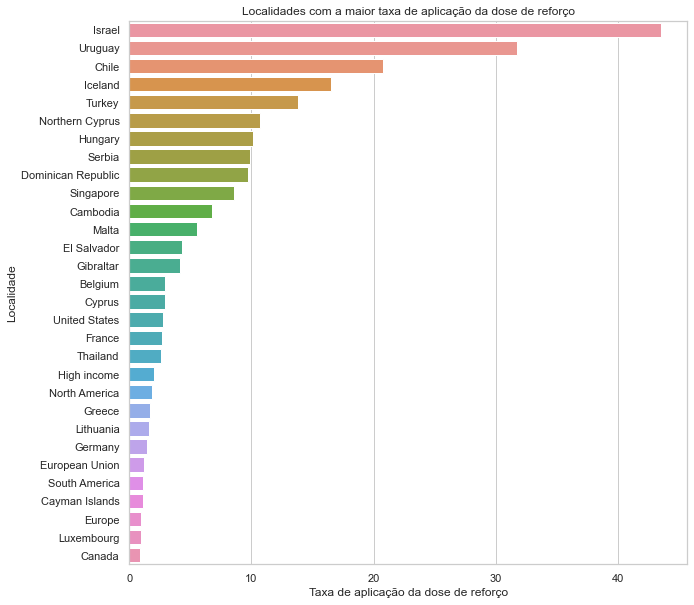

In [25]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax =sns.barplot(y=total_boosters_per_hundred.head(30).index, x=total_boosters_per_hundred.head(30).values)
ax.set_xlabel("Taxa de aplicação da dose de reforço")
ax.set_ylabel("Localidade")
ax.set_title("Localidades com a maior taxa de aplicação da dose de reforço")
plt.show()

Vemos que Isreal (+40%), Uruguai (+30%) e Chile (+20%) são os países que mais aplicaram a dose de reforço proporcionalmente ao tamanho de sua população. 

Notamos que são poucos os países com uma taxa considerável de aplicação da dose de reforço. Vamos ir um pouco mais fundo nessa feature, e ver um resumo estatístico desta métrica. Mas antes, vamos assumir que os valores faltantes (NaN) nessa feature equivale a 0 doses de reforço aplicadas:

In [26]:
locations_with_boosters = total_boosters_per_hundred.dropna() 

total_boosters_per_hundred

location
Israel               43.45
Uruguay              31.74
Chile                20.75
Iceland              16.49
Turkey               13.83
                     ...  
Wales                  NaN
Wallis and Futuna      NaN
Yemen                  NaN
Zambia                 NaN
Zimbabwe               NaN
Name: total_boosters_per_hundred, Length: 234, dtype: float64

In [27]:
total_boosters_per_hundred = total_boosters_per_hundred.fillna(0)
total_boosters_per_hundred

location
Israel               43.45
Uruguay              31.74
Chile                20.75
Iceland              16.49
Turkey               13.83
                     ...  
Wales                 0.00
Wallis and Futuna     0.00
Yemen                 0.00
Zambia                0.00
Zimbabwe              0.00
Name: total_boosters_per_hundred, Length: 234, dtype: float64

In [28]:
total_boosters_per_hundred.describe()

count    234.000000
mean       0.978376
std        4.256959
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       43.450000
Name: total_boosters_per_hundred, dtype: float64

A administração da dose de reforço foi iniciada recentemente por alguns países, porém muitos não adotaram esta dose da campanha de vacinação. Como pode ser visto na média dentre todas as localidades de apenas 1% da população com a dose de reforço.

Rodando o describe() somente para os países que possuem dados de dose de reforço, temos:

In [29]:
locations_with_boosters.describe()

count    41.000000
mean      5.583902
std       8.899393
min       0.010000
25%       0.810000
50%       1.840000
75%       6.780000
max      43.450000
Name: total_boosters_per_hundred, dtype: float64

Notamos que apenas 41 localidades das 234 localidades da base disponibilizaram dados referentes a dose de reforço. Uma hipótese provável para este pequeno número de dados da dose de reforço é devido a aplicação das mesmas ter sido iniciada recentemente (O Brasil por exemplo já iniciou a aplicação, mas a base de dados ainda não contabilizou estas doses), sendo que muitos países nem sequer começaram a sua aplicação.

Dentre as localidades que iniciaram a administração da dose de reforço, temos uma média 5,5% da população himunizada com tal dose.

### Outras análises que podem ser feitas

No momento, estas são as análises a serem apresentadas, porém em estudos futuros, pode-se:
- Analisar a vacinação em função dos dias da semana (qual dia vacina mais, qual dia vacina menos e etc.);
- Comparar os dados de vacinações entre os continentes ou blocos econômicos;
- Mesclar este dataset com o dataset geral de COVID do Our World In Data, e fazer análises em cima da relação entre vacinação e mortes;
- Mesclar este dataset com algum dataset que traz informações socio-econômicas da localidade, a fim de fazer análises em cima da relação entre quantidade de doses disponibilizadas (ou a índice de pessoas completamente vacinadas) e o tamanho da população da localidade, a renda per capita, e etc. 
- Dentre muitas outras análises.